In [1]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
CostVsLiving_filename = "CostOfLiving.xlsx"
cvl = pd.read_excel(CostVsLiving_filename)

In [3]:
QAFFECTED = "In your opinion, do you believe your current living arrangements have affected your academic performance?"
QCURRENTRES = "Where do you reside during the course of the academic year?"

#[positive, negative, uncertain, no effect]
onoffcampus = {"On-Campus": [0,0,0,0], "Off-Campus": [0,0,0,0]}

for a, c in zip(cvl[QAFFECTED], cvl[QCURRENTRES]):
    c = c.strip()
    if "Positively" in a: onoffcampus[c][0] += 1
    elif "Negatively" in a: onoffcampus[c][1] += 1
    elif "not sure" in a: onoffcampus[c][2] += 1
    else: onoffcampus[c][3] += 1

print(onoffcampus)

{'On-Campus': [15, 1, 11, 22], 'Off-Campus': [18, 11, 5, 15]}


In [4]:
onoffcampus_df = pd.DataFrame(data=onoffcampus)
onoffcampus_df.index = ["Positively", "Negatively", "Uncertain", "No Effect"]

array([[<AxesSubplot:ylabel='On-Campus'>,
        <AxesSubplot:ylabel='Off-Campus'>]], dtype=object)

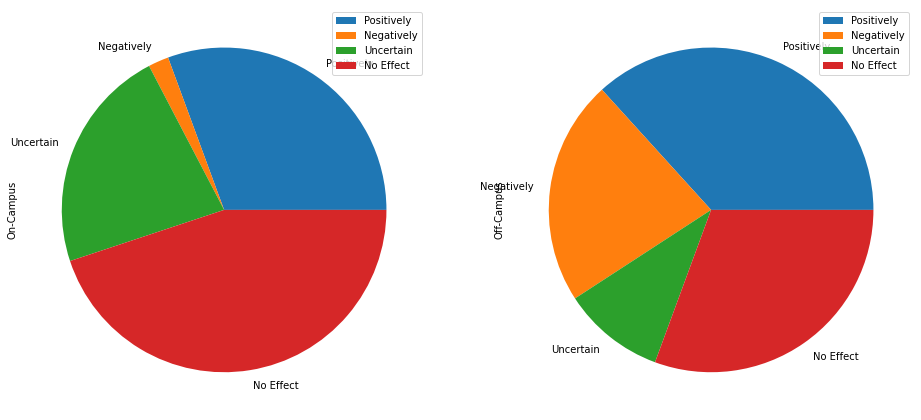

In [5]:
onoffcampus_df.plot.pie(subplots=True, figsize=(16,16), layout=(1, 2))

array([[<AxesSubplot:ylabel='Positively'>,
        <AxesSubplot:ylabel='Negatively'>],
       [<AxesSubplot:ylabel='Uncertain'>,
        <AxesSubplot:ylabel='No Effect'>]], dtype=object)

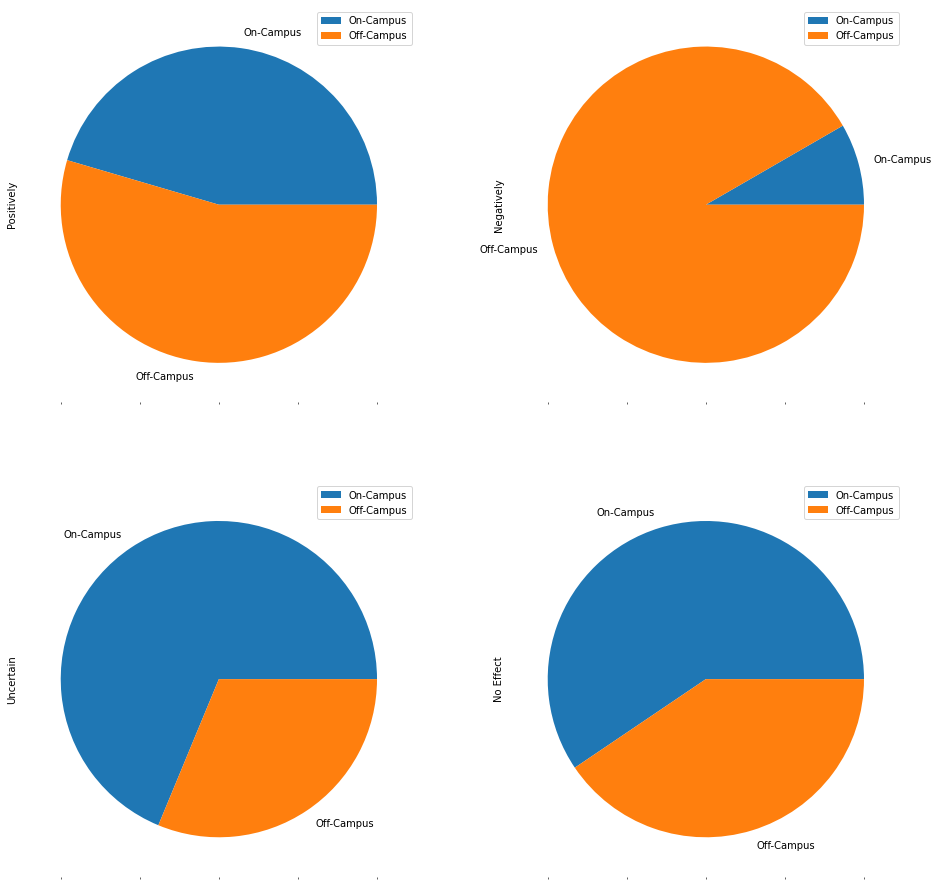

In [6]:
onoffcampus_df.T.plot.pie(subplots=True, figsize=(16,16), layout=(2,2))

In [7]:
onoffcampus_norm = dict(onoffcampus)
for k,v in onoffcampus_norm.items():
    onoffcampus_norm[k] = [x/sum(v) for x in v]
onoffcampus_norm

{'On-Campus': [0.30612244897959184,
  0.02040816326530612,
  0.22448979591836735,
  0.4489795918367347],
 'Off-Campus': [0.3673469387755102,
  0.22448979591836735,
  0.10204081632653061,
  0.30612244897959184]}

array([[<AxesSubplot:title={'center':'Positively'}>],
       [<AxesSubplot:title={'center':'Negatively'}>],
       [<AxesSubplot:title={'center':'Uncertain'}>],
       [<AxesSubplot:title={'center':'No Effect'}>]], dtype=object)

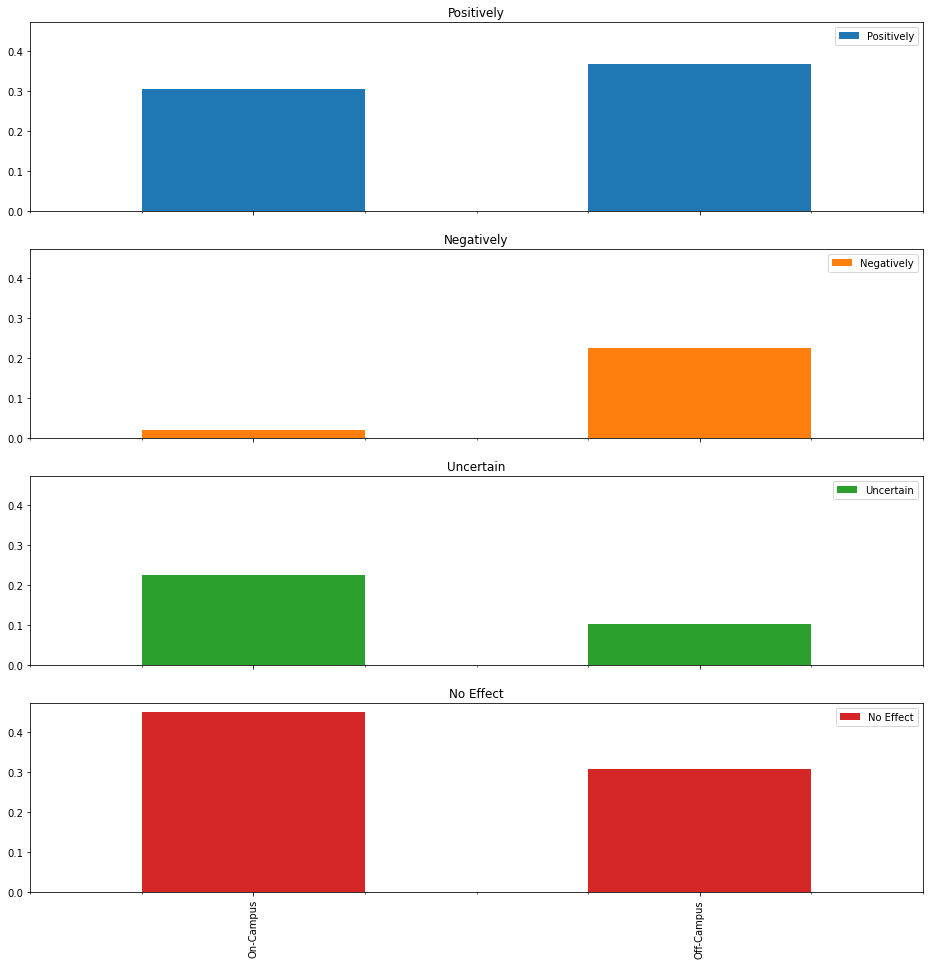

In [8]:
onoffcampus_df_norm = pd.DataFrame(data=onoffcampus_norm)
onoffcampus_df_norm.index = ["Positively", "Negatively", "Uncertain", "No Effect"]

onoffcampus_df_norm.T.plot.bar(subplots=True, figsize=(16,16), layout=(4,1), sharey=True)

In [9]:
#QCURRENTRES = "Where do you reside during the course of the academic year?"
QGENDER = "To which gender do you most identify?"
QGPA = "What is your GPA on a 4.0 scale?"

#[Uncertain, <2, 2-3, 3-4]
gpa_gender_onoffcampus = {
    "On-Campus":  {"Male": [0,0,0,0], "Female": [0,0,0,0]},
    "Off-Campus": {"Male": [0,0,0,0], "Female": [0,0,0,0]}
}

GPAINDEX = {
    "I don't know": 0,
    "less than 2.0": 1,
    "2.0 to 2.9": 2,
    "3.0 to 4.0": 3
}

for res, gend, gpa in zip(cvl[QCURRENTRES], cvl[QGENDER], cvl[QGPA]):
    res, gend, gpa = res.strip(), gend.strip(), GPAINDEX[gpa]
    if gend not in ("Male", "Female"): continue
    gpa_gender_onoffcampus[res][gend][gpa] += 1
    
print(gpa_gender_onoffcampus)

# for a, c in zip(cvl[QAFFECTED], cvl[QCURRENTRES]):
#     c = c.strip()
#     if "Positively" in a: onoffcampus[c][0] += 1
#     elif "Negatively" in a: onoffcampus[c][1] += 1
#     elif "not sure" in a: onoffcampus[c][2] += 1
#     else: onoffcampus[c][3] += 1

# print(onoffcampus)

{'On-Campus': {'Male': [1, 0, 3, 15], 'Female': [1, 0, 7, 20]}, 'Off-Campus': {'Male': [2, 0, 7, 18], 'Female': [1, 0, 3, 16]}}


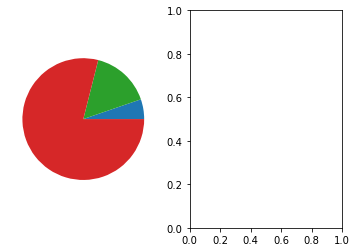

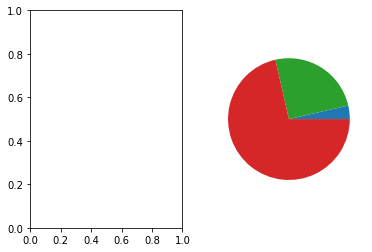

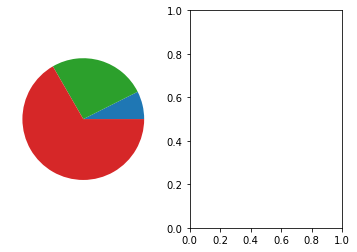

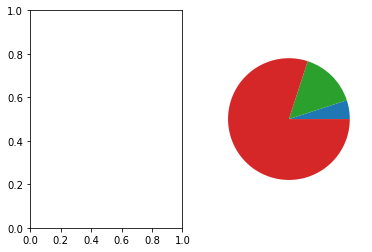

In [10]:
for chart in gpa_gender_onoffcampus.values():
    for n, g in enumerate(chart.values()):
        _, ax = plt.subplots(1,2)
        ax[n].pie(g)